In [18]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Работа с массивами NumPy

**N. Все упражнения ниже нужно делать без использования циклов Python**

**1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [19]:
2 ** np.arange(1,21) / np.arange(1,21)

array([  2.00000000e+00,   2.00000000e+00,   2.66666667e+00,
         4.00000000e+00,   6.40000000e+00,   1.06666667e+01,
         1.82857143e+01,   3.20000000e+01,   5.68888889e+01,
         1.02400000e+02,   1.86181818e+02,   3.41333333e+02,
         6.30153846e+02,   1.17028571e+03,   2.18453333e+03,
         4.09600000e+03,   7.71011765e+03,   1.45635556e+04,
         2.75941053e+04,   5.24288000e+04])

**2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [20]:
np.sum(0.1 ** (3*np.arange(6)) * 0.2 ** (4*np.arange(6)))

1.00000160000256

**3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [21]:
M = np.zeros((8,8))
M[::2, ::2] = 1
M[1::2, 1::2] = 1

M

array([[ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.]])

**4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

In [22]:
X = np.random.random((5, 2))
    
R = np.sqrt(np.sum(X**2, axis=1)).reshape((5,1))
PHI = np.arctan(np.divide(X[:5,1], X[:5,0])).reshape((5,1))

M = np.hstack((R, PHI))
M

array([[ 1.15201931,  1.01590248],
       [ 1.02665108,  1.28460592],
       [ 1.18307536,  0.73373919],
       [ 0.51796154,  0.62016007],
       [ 0.62233457,  0.43321605]])

**5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [23]:
X = np.random.random((10, 10))

m = np.argmax(X)
row = m // 10
col = m % 10

print((row, col))

(9, 5)


**6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

In [24]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))

i = np.argmin(np.sqrt(np.sum(((X - y) ** 2), axis=1)))
print(X[i])

[ 0.3284477   0.79612505]


**7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте массив из её значений на  $-3 \le x \le 3$.

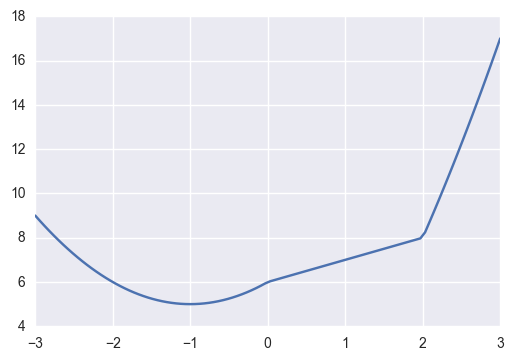

In [44]:
def f(x):
    if x < 0:
        return x ** 2 + 2 * x + 6
    elif 0 <= x <= 2:
        return x + 6
    else:
        return x ** 2 + 4 * x - 4 

v_f = np.vectorize(f)
x = np.linspace(-3, 3, 100)
y = v_f(x)

plt.plot(x, y)

**8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [27]:
X = np.random.random((10, 10))

M = X - np.mean(X, axis=1).reshape((10,1))
np.mean(M, axis=1)

array([ -2.22044605e-17,  -3.33066907e-17,   1.11022302e-17,
         1.11022302e-17,   0.00000000e+00,  -8.88178420e-17,
        -1.11022302e-17,  -2.22044605e-17,  -1.11022302e-17,
        -9.99200722e-17])

**9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

In [28]:
X = np.random.normal(loc=5, scale=2., size=1000)

e = X.mean()
d = np.mean(np.abs(X - X.mean()) ** 2) 

print("Выборочное среднее: {},Выборочная дисперсия: {}".format(e, d))

Выборочное среднее: 4.961844475270579,Выборочная дисперсия: 3.9175666428552867


**10.** Создать матрицу:

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [39]:
M = np.zeros((5,5))

it = np.nditer(M, flags=['multi_index'], op_flags=['writeonly'])
while not it.finished:
    it[0] = (it.multi_index[0] + it.multi_index[1]) % 5
    it.iternext()

M

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.,  0.],
       [ 2.,  3.,  4.,  0.,  1.],
       [ 3.,  4.,  0.,  1.,  2.],
       [ 4.,  0.,  1.,  2.,  3.]])